In [1]:
from risk_budgeting import RiskBudgeting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
data = pd.read_csv('daily_returns_data.csv', index_col=0)
data

,NLOK,AIG,NFLX
2008-08-08,0.015242,0.043205,0.019370
2008-08-11,0.008644,-0.016084,0.037037
2008-08-12,-0.012630,-0.066204,-0.043168
2008-08-13,0.007309,-0.035011,0.011360
2008-08-14,0.020408,0.034921,0.021823
...,...,...,...
2022-04-08,-0.013623,0.024003,-0.017313
2022-04-11,-0.006719,-0.008869,-0.022142
2022-04-12,-0.006764,-0.002077,-0.011207
2022-04-13,0.016648,0.008487,0.018396


In [4]:
X = data.values
X

array([[ 0.01524249,  0.0432047 ,  0.01936967],
       [ 0.00864422, -0.01608363,  0.03703704],
       [-0.01262968, -0.06620351, -0.0431677 ],
       ...,
       [-0.00676437, -0.00207734, -0.0112069 ],
       [ 0.01664775,  0.00848679,  0.01839582],
       [-0.00855973,  0.0007939 , -0.02653882]])

### Example use cases 

In [5]:
# we define our risk budgeting problem
rb = RiskBudgeting(risk_measure='volatility',
                   budgets='ERC')

In [6]:
# we solve the defined problem using given sample of asset returns
rb.solve(X)

In [7]:
# weigths of the risk budgeting portfolio
rb.x

array([0.4415268 , 0.23853649, 0.31993671])

In [8]:
# we can assign different risk budgets
rb = RiskBudgeting(risk_measure='volatility',
                   budgets=np.array([0.5, 0.3, 0.2]))

rb.solve(X)
rb.x

array([0.55654091, 0.21705099, 0.2264081 ])

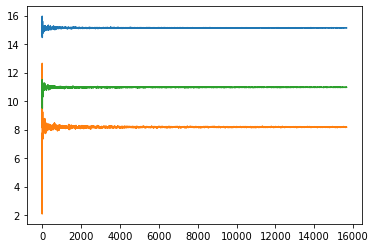

In [9]:
# we can store the evolution of variables through out the optimization process to observe convergence
rb = RiskBudgeting(risk_measure='volatility',
                   budgets='ERC')

rb.solve(X, store=True)
plt.plot(rb.ys);

In [10]:
# we define our risk budgeting problem for expected shortfall
rb = RiskBudgeting(risk_measure='expected_shortfall',
                   alpha=0.95,
                   budgets='ERC')

rb.solve(X)
rb.x

array([0.40717944, 0.23852254, 0.35429802])

In [11]:
# we can factor out expected returns from expected shortfall
rb = RiskBudgeting(risk_measure='expected_shortfall',
                   alpha=0.95,
                   expectation=True,
                   budgets='ERC')

rb.solve(X)
rb.x

array([0.41006767, 0.24097655, 0.34895578])

In [12]:
# we define our risk budgeting problem for power spectral measure
rb = RiskBudgeting(risk_measure='power_spectral_risk_measure',
                   gamma=20,
                   budgets='ERC')

rb.solve(X)
rb.x

array([0.41101464, 0.24209383, 0.34689153])

In [13]:
# we define our risk budgeting problem for variantile
rb = RiskBudgeting(risk_measure='variantile',
                   alpha=0.99,
                   budgets='ERC')

rb.solve(X)
rb.x

array([0.40847699, 0.24706063, 0.34446238])

### Customize hyperparameters of the solver

array([0.41636391, 0.2932629 , 0.29037319])

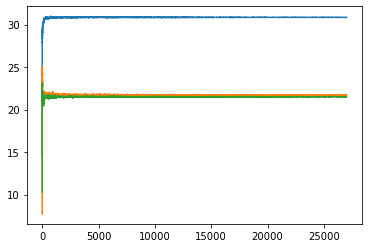

In [14]:
# we can define our risk budgeting problem for median absolute deviation
rb = RiskBudgeting(risk_measure='median_absolute_deviation',
                   budgets='ERC')

# Choosing the parameters/hyperparameters of stochastic gradient descent is a sensitive task. We can modify parameters to ensure convergence
rb.solve(X,
         epochs=500,
         minibatch_size=64,
         eta_0_y=500, 
         eta_0_t=1,
         c=0.65,
         polyak_ruppert=0.2,
         store=True)

plt.plot(rb.ys);
rb.x